In [58]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.datasets
from sklearn.model_selection import train_test_split
# from xgboost import XGBRegresssor 
from sklearn import metrics

In [63]:
housing = pd.read_csv("data.csv")

In [64]:
housing.head(25)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1   ZN       505 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       502 non-null    float64
 6   AGE      505 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      505 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [65]:
# Cheking missing value 
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         3
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [68]:
housing.dropna(axis=1,inplace=True)
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
housing['CHAS'].value_counts()

CHAS
0    470
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,505.000000,505.000000,505.000000,505.000000,505.000000,502.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620235,11.386139,11.139644,0.069307,0.554635,6.292428,68.552871,3.797611,9.556436,408.271287,18.454059,356.594376,12.649743,22.544158
std,8.608748,23.340080,6.866852,0.254227,0.115985,0.697923,28.172406,2.107005,8.714456,168.702482,2.166838,91.367787,7.147751,9.202674
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081990,0.000000,5.190000,0.000000,0.449000,5.888000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,6.930000,17.100000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.210000,77.300000,3.215700,5.000000,330.000000,19.000000,391.430000,11.340000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.628000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
# show graphs in here imidelte
%matplotlib inline

In [69]:
# Correction between various dataset
correction =housing.corr()

<Axes: >

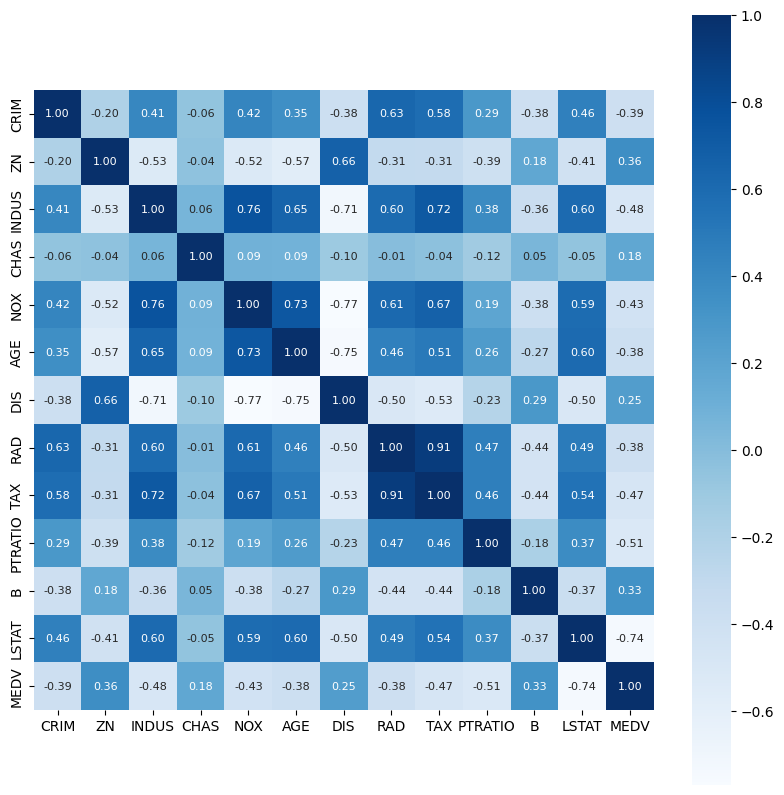

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(correction,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Blues')

In [73]:
X=housing.drop(['MEDV'],axis=1)
Y=housing['MEDV']
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX   AGE     DIS  RAD  TAX  PTRATIO   
0    0.00632  18.0   2.31     0  0.538  65.2  4.0900    1  296     15.3  \
1    0.02731   0.0   7.07     0  0.469  78.9  4.9671    2  242     17.8   
2    0.02729   0.0   7.07     0  0.469  61.1  4.9671    2  242     17.8   
3    0.03237   0.0   2.18     0  0.458  45.8  6.0622    3  222     18.7   
4    0.06905   0.0   2.18     0  0.458  54.2  6.0622    3  222     18.7   
..       ...   ...    ...   ...    ...   ...     ...  ...  ...      ...   
500  0.06263   0.0  11.93     0  0.573  69.1  2.4786    1  273     21.0   
501  0.04527   0.0  11.93     0  0.573  76.7  2.2875    1  273     21.0   
502  0.06076   0.0  11.93     0  0.573  91.0  2.1675    1  273     21.0   
503  0.10959   0.0  11.93     0  0.573  89.3  2.3889    1  273     21.0   
504  0.04741   0.0  11.93     0  0.573  80.8  2.5050    1  273     21.0   

          B  LSTAT  
0    396.90   4.98  
1    396.90   9.14  
2    392.83   4.03  
3    394.63   2

# Train_Test_Splitting

In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [76]:
print(X.shape,X_train.shape,X_test.shape)

(505, 12) (404, 12) (101, 12)


In [82]:
from xgboost import XGBRegressor
model=XGBRegressor()

In [83]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [87]:
training_data_prediction = model.predict(X_train)

In [88]:
print(training_data_prediction)

[23.814579  21.0155    21.993975  34.706284  13.912758  12.701471
 19.220373  20.106106  23.188879  21.6989    29.797731   6.2995806
 19.895597  49.99813   19.900906  23.387514  18.676022  14.333499
 10.192498  15.072902  22.60961   21.51123   27.06158    4.9922767
 22.192663  19.120827  29.398836  12.003117  46.69086   18.564821
  9.603874  17.411652  10.799845  13.9043665 16.487022  19.065117
 27.008284  21.925703   8.796817  24.181475  25.009785  13.521283
 15.303781  15.596982  12.712499  29.790533  15.007253  46.00129
 17.51706   20.606836  24.30436   16.701445  26.597515  19.30611
 19.061607  34.60425   17.174725  20.598022  28.650864  20.926186
 30.691881  13.398026  29.097622  32.687393  43.99663   23.700747
 49.979218  20.587597  24.506306  29.887789  28.40538   24.797043
 33.398968  25.303751  49.990814  13.101535  17.481747  35.408222
 22.58705   50.004524  48.50211   23.315493  23.096231  14.11276
 17.616743  33.096855  25.113628  20.390566  19.800837  23.310066
 22.411406 

In [92]:
from sklearn.metrics import r2_score, mean_absolute_error
score_01=metrics.r2_score(Y_train,training_data_prediction)

score_02=metrics.mean_absolute_error(Y_train,training_data_prediction)

print("sequence error:",score_01)
print("Mean absolute error:",score_02)

sequence error: 0.9999945749274287
Mean absolute error: 0.015000026532919045


In [93]:
# Prediction on test data
test_data_prediction=model.predict(X_test)

In [94]:
score_01=metrics.r2_score(Y_test,test_data_prediction)

score_02=metrics.mean_absolute_error(Y_test,test_data_prediction)

print("sequence error:",score_01)
print("Mean absolute error:",score_02)

sequence error: 0.7712427810321181
Mean absolute error: 2.8226980294331465


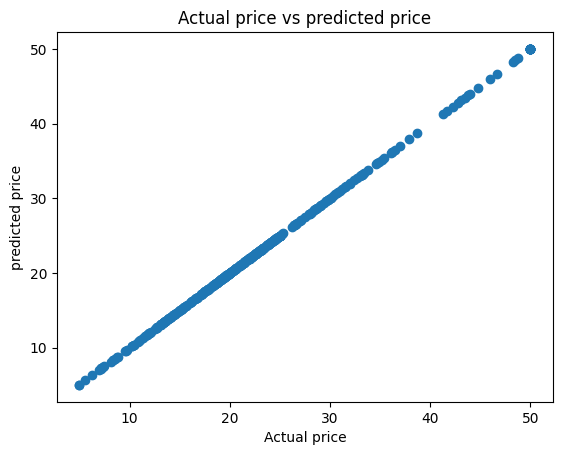

In [95]:
# Visulization the actual price and predicted price
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual price')
plt.ylabel('predicted price')
plt.title('Actual price vs predicted price')
plt.show()